# Capstone 3: Telco Customer Churn
Ganeswara Pramudita

## Bussiness Problem

Sebuah perusahaan di bidang telekomunikasi ingin menganalisis tingkat *customer churn*-nya. *Customer churn* adalah seberapa banyak pelanggan yang berhenti berlangganan atau membeli produk dari perusahaan kita. Semakin rendah nilai *churn*, semakin sedikit pelanggan yang berhenti berlangganan, semakin baik bisnis. Sebaliknya, semakin tinggi nilai *churn*, maka semakin buruk keadaan bisnis. Perusahaan memiliki data *customer churn* dan ingin menggunakannya untuk memprediksi pelanggan mana yang berisiko berhenti berlangganan, sehingga perusahaan dapat mengambil langkah pencegahan untuk menjaga *customer churn* tetap rendah ke depannya.

### Problem Statement

*Customer churn* merupakan salah satu metrik yang penting khususnya bagi perusahaan SaaS (Software as a Service). Mendapatkan konsumen baru memerlukan sumber daya yang lebih banyak dibanding mempertahankan konsumen reguler [1], [2]. karenanya, mempertahankan *customer churn* yang rendah berdampak pada keuntungan perusahaan yang lebih tinggi. *Customer churn rate* untuk tiap industri berbeda, tapi secara umum, *customer churn rate* yang ideal adalah sekitar 5-7% [1], dan *customer churn rate* di bawah 3% bisa dikatakan bagus [2].

Cara yang paling efektif untuk menjaga *customer churn* yang rendah adalah dengan mencegah pelanggan untuk berhenti berlangganan. Analisis *customer churn* dapat memperlihatkan faktor-faktor yang mungkin mempengaruhi keputusan konsumen untuk berhenti berlangganan, yang bisa membantu perusahaan untuk menentukan langkah preventif yang tepat. Membuat model untuk prediksi *churn* juga dapat membantu perusahaan untuk menentukan segmen konsumen yang berisiko untuk berhenti berlangganan, sehingga keputusan yang diambil bisa diterapkan dengan efektif.

### Goals

Perusahaan ingin memiliki kemampuan untuk memprediksi pelanggan yang berisiko untuk berhenti berlangganan, sehingga dapat memfokuskan layanan dan pemasaran kepada segmen konsumen tersebut. Perusahaan juga ingin mengetahui kriteria apa saja yang mungkin menyebabkan seorang pelanggan berhenti berlangganan, sehingga bisa membuat strategi yang tepat untuk menjaga pelanggan agar tetap berlangganan.

### Analytic Approach

Kita akan melakukan analisis data untuk menentukan faktor-faktor yang menyebabkan seorang pelanggan berisiko untuk berhenti berlangganan. Kemudian, kita akan menggunakan pembelajaran mesin untuk membangun model klasifikasi yang akan digunakan untuk memprediksi apakah seorang pelanggan berisiko berhenti berlangganan atau tidak.

### Evaluation Metric

Pada kasus *false positive*, pelanggan yang tidak berisiko berhenti berlangganan akan merasakan peningkatan dalam layanan dan promosi. Tergantung dari peningkatan pelayanan spesifik yang dilakukan, perusahaan mungkin mengerahkan sumber daya dengan sia-sia. Tapi mempertimbangkan bahwa layanan yang ditingkatkan akan dirasakan oleh semua pelanggan yang berlangganan layanan tersebut, hal ini juga bisa meningkatkan citra perusahaan. Karenanya, walaupun akan lebih baik jika terjadi, kasus ini tidak terlalu buruk.

Pada kasus *false negative*, pelanggan yang berisiko berhenti berlangganan tidak akan merasakan peningkatan pelayanan dan promosi yang ditargetkan secara khusus. Hal ini meningkatkan resiko pelanggan tersebut untuk berhenti berlangganan, yang bisa berakibat pada naiknya tingkat *customer churn*. Menghindari kasus ini adalah tujuan utama dilakukannya projek ini.

Berdasarkan konsekuensinya, kita ingin menghindari kedua kasus tersebut, khususnya *false negative*. Maka, metrik yang akan kita gunakan adalah recall, PR-AUC dan ROC-AUC [3].

## Exploratory Data Analysis

Dataset: https://drive.google.com/file/d/1oB5uKtJr7dWcWr9Ld5ZFAuVkpV005ceH/view?usp=drive_link


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import normaltest

### Data Understanding

In [2]:
DF = pd.read_csv('data_telco_customer_churn.csv')
display(DF)

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,Yes
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,No
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,No
...,...,...,...,...,...,...,...,...,...,...,...
4925,No,15,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,103.45,No
4926,Yes,10,No,No,Fiber optic,Yes,Yes,Month-to-month,Yes,91.10,No
4927,No,58,No internet service,No internet service,No,No internet service,No internet service,Two year,No,20.75,No
4928,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,69.75,Yes


Dataset ini berisi 4930 baris yang berupa informasi pelanggan perusahaan yang mungkin berhubungan dengan keputusan pelanggan untuk berhenti berlangganan atau tidak (perhatikan bahwa tidak ada fitur yang jelas tidak memiliki pengaruh seperti ID atau nama pelanggan). Masing-masing baris merepresentasikan informasi dari seorang pelanggan. 19 kolom dataset ini terdiri dari:

1.  `Dependents`: Apakah pelanggan memiliki tanggungan.
2.  `tenure`: Lamanya pelanggan telah berlangganan dalam bulan.
3.  `OnlineSecurity`: Apakah pelanggan menerima perlindungan *online*.
4.  `OnlineBackup`: Apakah pelanggan menerima layanan *backup online*.
5.  `InternetService`: Apakah pelanggan berlangganan layanan internet.
6.  `DeviceProtection`: Apakah pelanggan menerima proteksi perangkat.
7.  `TechSupport`: Apakah pelanggan menerima *tech support*.
8.  `Contract`: Tipe kontrak berdasarkan durasi.
9.  `PaperlessBilling`: Apakah tagihan dikirimkan tanpa kertas.
10. `MonthlyCharges`: Tagihan bulanan (diasumsikan dalam dollar).
11. `Churn`: Apakah pelanggan berhenti berlangganan.

Kolom `Churn` akan menjadi kolom target  dengan ketentuan sebagai berikut:

yes (positif) : Pelanggan berhenti berlangganan.

no (negatif)&nbsp;: Pelanggan masih berlangganan.

Selanjutnya kita akan melihat informasi umum dari dataset yang digunakan, seperti tipe data dan statistik deskriptif dari masing-masing kolom.

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


In [ ]:
display(DF.describe(), DF.describe(include='object'))

,tenure,MonthlyCharges
count,4930.000000,4930.000000
mean,32.401217,64.883032
std,24.501193,29.923960
min,0.000000,18.800000
25%,9.000000,37.050000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.650000


,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn
count,4930,4930,4930,4930,4930,4930,4930,4930,4930
unique,2,3,3,3,3,3,3,2,2
top,No,No,No,Fiber optic,No,No,Month-to-month,Yes,No
freq,3446,2445,2172,2172,2186,2467,2721,2957,3614


Berdasarkan informasi tersebut, kita dapat melihat beberapa hal:

*   Dataset memiliki 4930 baris dan 11 kolom.
*   Semua kolom berisi 4930 data tak-kosong, yang berarti tidak ada data yang kosong.
*   Hanya ada dua fitur yang bersifat numerik; `tenure` dan `MonthlyCharges`.
*   Sebagian besar fitur, termasuk fitur target (9) bersifat kategorik dengan kardinalitas paling tinggi 2.

Kita akan coba melihat nilai unik dari masing-masing kolomnya.

In [3]:
UniqVal=pd.DataFrame([[x, DF[x].dtype,DF[x].nunique(),DF[x].unique()] for x in DF.columns],
                     columns=['Kolom','Tipe data','Banyak nilai unik','Nilai unik'])
UniqVal

,Kolom,Tipe data,Banyak nilai unik,Nilai unik
0,Dependents,object,2,"[Yes, No]"
1,tenure,int64,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,3,"[No, Yes, No internet service]"
4,InternetService,object,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,3,"[Yes, No internet service, No]"
6,TechSupport,object,3,"[Yes, No, No internet service]"
7,Contract,object,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,2,"[Yes, No]"
9,MonthlyCharges,float64,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


Dari tabel, kita dapat melihat beberapa hal;

*   Tidak ada nilai pengganti untuk data kosong.
*   Mayoritas fitur kategorik bersifat nominal, hanya fitur `Contract` yang mungkin bisa dianggap ordinal.
*   Fitur `Dependents` dan `PaperlessBilling` juga bisa dikategorikan sebagai fitur kategorik biner.
*   Perhatikan bahwa walaupun fitur `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport` masing-masing memiliki tiga nilai, secara praktis keempat kriteria tersebut hanya mungkin bernilai iya atau tidak. Dari fitur-fitur di dataset, yang mungkin memengaruhi besarnya tagihan pelanggan adalah keempat fitur tersebut serta `InternetService`, `Contract`, dan `PaperlessBilling`, sehingga banyaknya kombinasi yang mungkin adalah 2<sup>5</sup> * 3<sup>2</sup> = 288. Karena fitur `MonthlyCharges` memiliki 1422 nilai unik, kita bisa asumsikan bahwa `MonthlyCharges` tidak bisa ditentukan hanya dari fitur-fitur lain di dataset ini.

Pada bagian selanjutnya, kita akan memeriksa dataset lebih lanjut dan melakukan proses *data cleaning* jika diperlukan.

### Data Cleaning

Seperti yang telah disebutkan di bagian sebelumnya, tidak ada data yang kosong. Kita akan coba mengecek data duplikat.

In [ ]:
DF[DF.duplicated(keep=False)]

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
87,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
187,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.65,No
204,No,18,No internet service,No internet service,No,No internet service,No internet service,One year,No,20.10,No
233,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,19.90,No
264,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,74.45,Yes
...,...,...,...,...,...,...,...,...,...,...,...
4759,No,4,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.05,No
4786,No,1,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,No,20.35,No
4788,No,1,No,No,Fiber optic,No,No,Month-to-month,Yes,70.10,Yes
4866,No,1,No,No,DSL,No,No,Month-to-month,Yes,55.00,Yes


Ada 146 baris yang sama dengan setidaknya 1 baris lainnya. Namun, karena kita tidak memiliki fitur yang bisa membedakan pelanggan seperti ID atau nama, kita tidak tahu apakah data-data tersebut memang data duplikat atau hanya pelanggan yang kebetulan memiliki data yang sama. Kita akan asumsikan mereka semua pelanggan yang berbeda dengan ata yang kebetulan sama. Selanjutnya, kita akan mengecek fitur `tenure` dan `MonthlyCharges` untuk *outlier*.

[Text(0.5, 1.0, 'Sebaran kolom MonthlyCharges')]

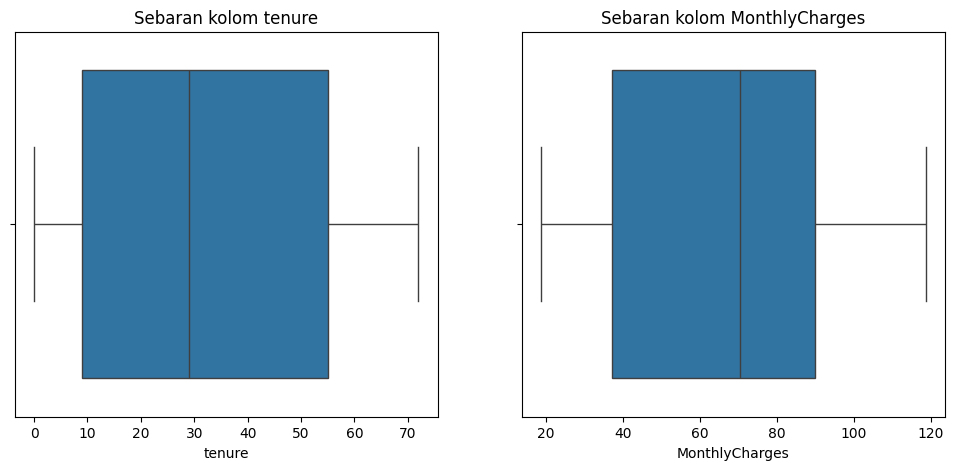

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.boxplot(ax=axes[0], data=DF, x='tenure').set(title='Sebaran kolom tenure')
sb.boxplot(ax=axes[1], data=DF, x='MonthlyCharges').set(title='Sebaran kolom MonthlyCharges')

Dari grafik di atas, terlihat bahwa tidak ada *outlier* di kolom `tenure` dan `MonthlyCharges`. Maka, tidak ada lagi yang perlu kita lakukan di proses *data cleaning*.

### Data Analysis

Sekarang kita akan melakukan *exploratory data analysis*. Pertama kita lihat fitur targetnya

In [ ]:
DFChurn=DF['Churn'].value_counts().to_frame()
DFChurn=DFChurn.reset_index()
DFChurn.rename(columns={'index':'Churn','Churn':'Count'},inplace=True)
DFChurn

,Churn,Count
0,No,3614
1,Yes,1316


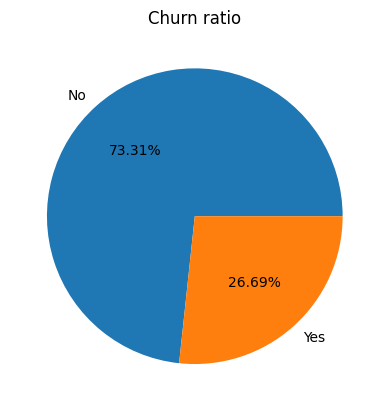

In [ ]:
plt.pie(DFChurn['Count'],labels=DFChurn['Churn'],autopct='%.2f%%')
plt.title('Churn ratio')
plt.show()

Terlihat bahwa fitur target dataset kita tidak seimbang, dengan target Yes sebanyak 26.69% dan target No sebanyak 73.31%. 26.69% juga merupakan angka yang tinggi untuk *customer churn rate*. Selanjutnya kita coba lihat fitur numerik.

[Text(0.5, 1.0, 'Box Plot Tagihan Bulanan')]

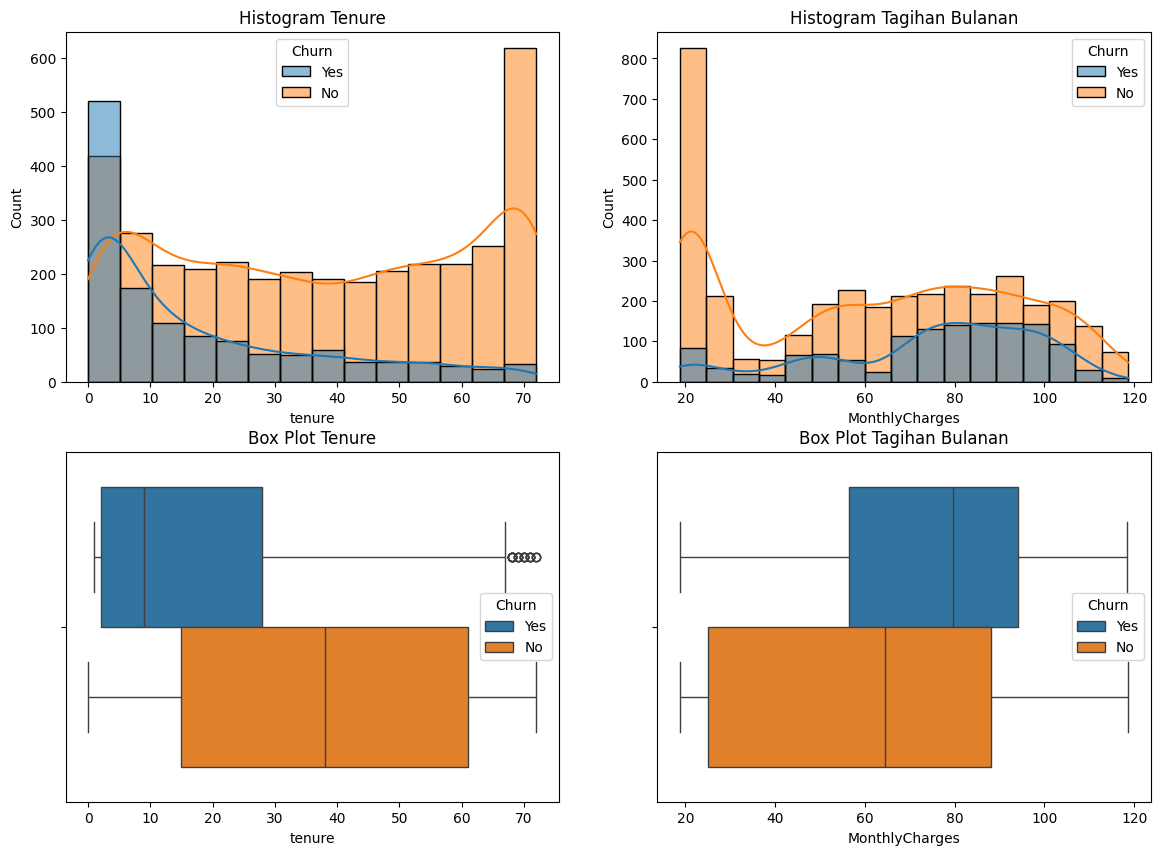

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sb.histplot(ax=axes[0,0], data=DF,x='tenure',hue='Churn',kde=True).set(title='Histogram Tenure')
sb.histplot(ax=axes[0,1], data=DF,x='MonthlyCharges',hue='Churn',kde=True).set(title='Histogram Tagihan Bulanan')
sb.boxplot(ax=axes[1,0], data=DF,x='tenure',hue='Churn').set(title='Box Plot Tenure')
sb.boxplot(ax=axes[1,1], data=DF,x='MonthlyCharges',hue='Churn').set(title='Box Plot Tagihan Bulanan')

Berdasarkan grafik fitur `tenure`, pelanggan cenderung berhenti berlangganan dalam 5 bulan pertama. hal ini menunjukkan bahwa perusahaan perlu memperhatikan strategi pemasaran dan pelayanan pada pelanggan baru.

Pada grafik `MonthlyCharges`, pelanggan yang tagihan bulanannya berkisar 80-100 dollar cenderung memiliki *churn rate* yang lebh tinggi.

Sekarang kita akan melihat fitur-fitur kategorik.

In [ ]:
def BarPlt(fitur,df=DF):
  DFTemp=df.groupby([fitur,'Churn']).size().reset_index()
  DFTemp.rename(columns={0:'Count'},inplace=True)
  DFTemp['%Within{}'.format(fitur)]=round(DFTemp['Count']/DFTemp.groupby(fitur)['Count'].transform(sum)*100,2)
  display(DFTemp)
  sb.barplot(DFTemp,x=fitur,y='Count',hue='Churn').set(title='Churn Rate Berdasarkan {}'.format(fitur))
  for x in df[fitur].unique():
    print('Churn rate {0} bernilai {1}: {2}'.format(
        fitur,x,DFTemp.loc[(DFTemp[fitur]==x) & (DFTemp['Churn']=='Yes'),'%Within{}'.format(fitur)].values[0]))

,Dependents,Churn,Count,%WithinDependents
0,No,No,2355,68.34
1,No,Yes,1091,31.66
2,Yes,No,1259,84.84
3,Yes,Yes,225,15.16


Churn rate Dependents bernilai Yes: 15.16
Churn rate Dependents bernilai No: 31.66


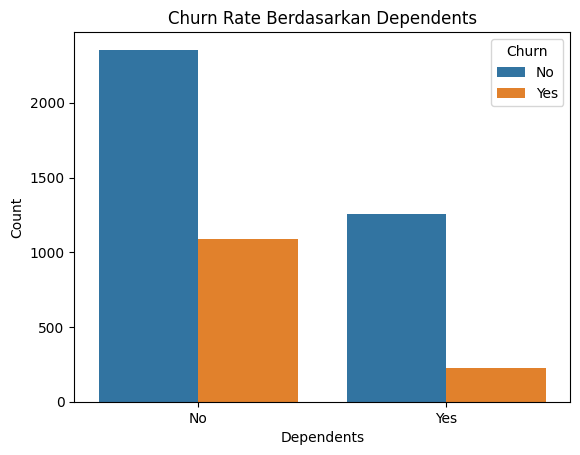

In [ ]:
BarPlt('Dependents')

,OnlineSecurity,Churn,Count,%WithinOnlineSecurity
0,No,No,1423,58.20
1,No,Yes,1022,41.80
2,No internet service,No,970,92.21
3,No internet service,Yes,82,7.79
4,Yes,No,1221,85.21
5,Yes,Yes,212,14.79


Churn rate OnlineSecurity bernilai No: 41.8
Churn rate OnlineSecurity bernilai Yes: 14.79
Churn rate OnlineSecurity bernilai No internet service: 7.79


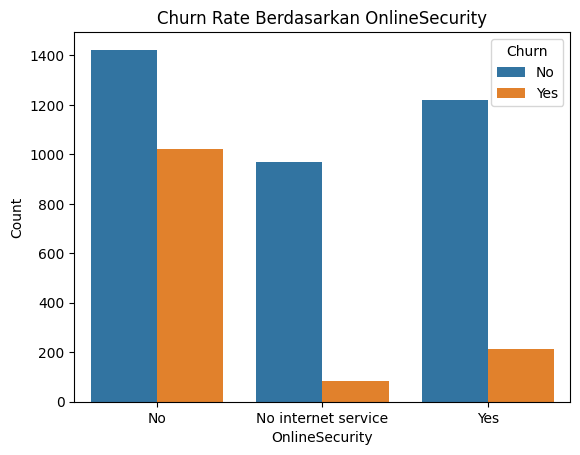

In [ ]:
BarPlt('OnlineSecurity')

,OnlineBackup,Churn,Count,%WithinOnlineBackup
0,No,No,1287,59.25
1,No,Yes,885,40.75
2,No internet service,No,970,92.21
3,No internet service,Yes,82,7.79
4,Yes,No,1357,79.54
5,Yes,Yes,349,20.46


Churn rate OnlineBackup bernilai No: 40.75
Churn rate OnlineBackup bernilai Yes: 20.46
Churn rate OnlineBackup bernilai No internet service: 7.79


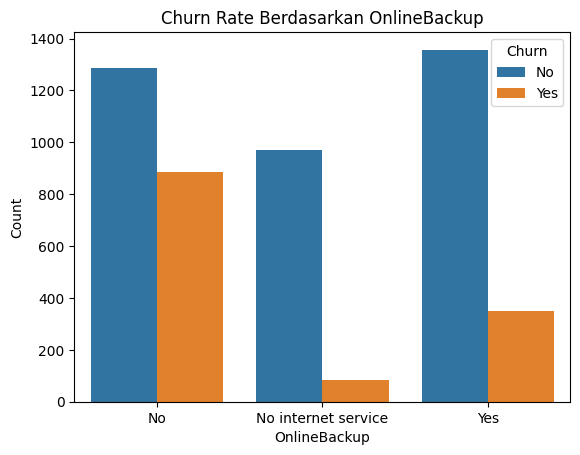

In [ ]:
BarPlt('OnlineBackup')

,InternetService,Churn,Count,%WithinInternetService
0,DSL,No,1388,81.36
1,DSL,Yes,318,18.64
2,Fiber optic,No,1256,57.83
3,Fiber optic,Yes,916,42.17
4,No,No,970,92.21
5,No,Yes,82,7.79


Churn rate InternetService bernilai DSL: 18.64
Churn rate InternetService bernilai Fiber optic: 42.17
Churn rate InternetService bernilai No: 7.79


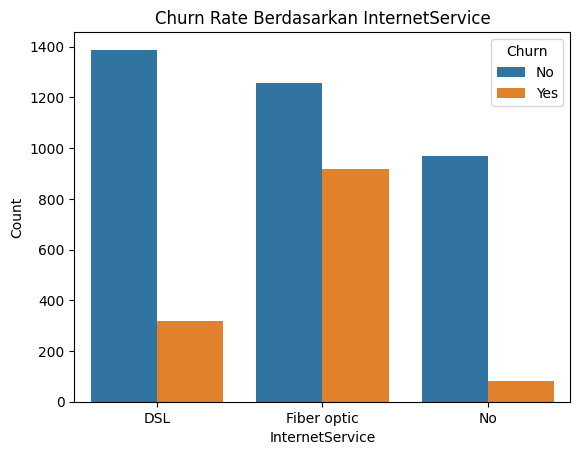

In [ ]:
BarPlt('InternetService')

,DeviceProtection,Churn,Count,%WithinDeviceProtection
0,No,No,1335,61.07
1,No,Yes,851,38.93
2,No internet service,No,970,92.21
3,No internet service,Yes,82,7.79
4,Yes,No,1309,77.36
5,Yes,Yes,383,22.64


Churn rate DeviceProtection bernilai Yes: 22.64
Churn rate DeviceProtection bernilai No internet service: 7.79
Churn rate DeviceProtection bernilai No: 38.93


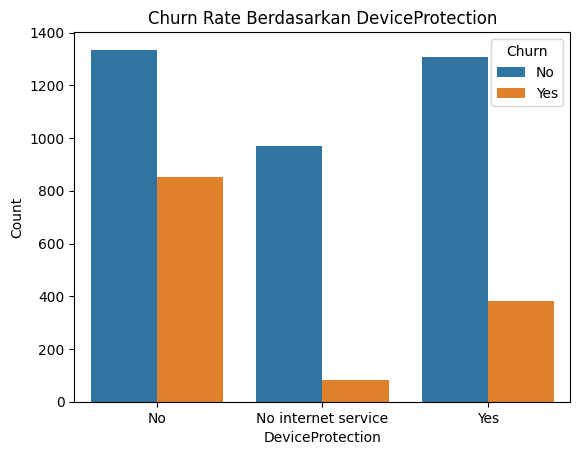

In [ ]:
BarPlt('DeviceProtection')

,TechSupport,Churn,Count,%WithinTechSupport
0,No,No,1447,58.65
1,No,Yes,1020,41.35
2,No internet service,No,970,92.21
3,No internet service,Yes,82,7.79
4,Yes,No,1197,84.83
5,Yes,Yes,214,15.17


Churn rate TechSupport bernilai Yes: 15.17
Churn rate TechSupport bernilai No: 41.35
Churn rate TechSupport bernilai No internet service: 7.79


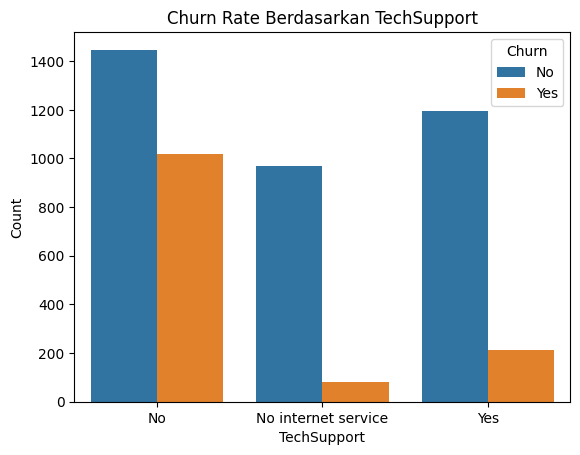

In [ ]:
BarPlt('TechSupport')

,Contract,Churn,Count,%WithinContract
0,Month-to-month,No,1543,56.71
1,Month-to-month,Yes,1178,43.29
2,One year,No,946,89.92
3,One year,Yes,106,10.08
4,Two year,No,1125,97.23
5,Two year,Yes,32,2.77


Churn rate Contract bernilai Month-to-month: 43.29
Churn rate Contract bernilai Two year: 2.77
Churn rate Contract bernilai One year: 10.08


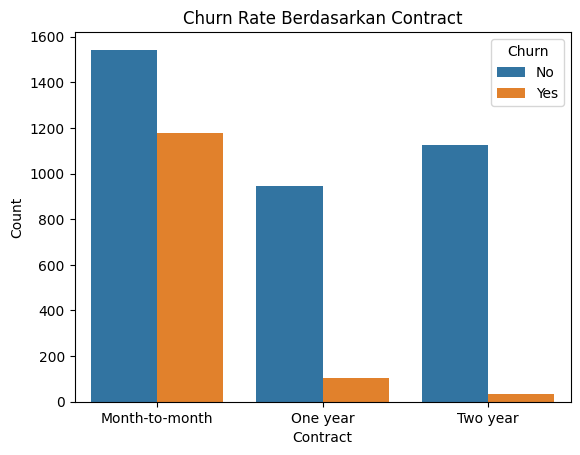

In [ ]:
BarPlt('Contract')

,PaperlessBilling,Churn,Count,%WithinPaperlessBilling
0,No,No,1648,83.53
1,No,Yes,325,16.47
2,Yes,No,1966,66.49
3,Yes,Yes,991,33.51


Churn rate PaperlessBilling bernilai Yes: 33.51
Churn rate PaperlessBilling bernilai No: 16.47


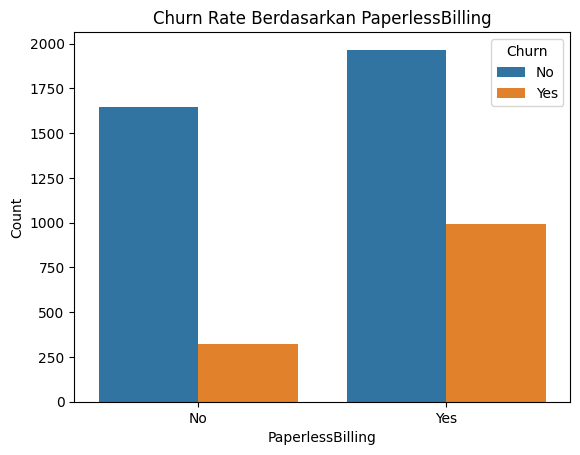

In [ ]:
BarPlt('PaperlessBilling')

Berdasarkan visualisasi di atas, kita bisa melihat beberapa hal:

*   *Churn rate* pelanggan dengan tanggungan mencapai 31.66%, 2 kali *churn rate* pelanggan tanpa tanggungan dengan 15.16%.
*   Pada fitur-fitur yang berhubungan dengan produk yang diterima pelanggan seperti `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, dan `TechSupport`, masing-masing grafik menunjukkan bahwa pelanggan yang tidak berlangganan produk tersebut memiliki *churn rate* yang lebih tinggi, dengan kisaran 40%, sedangkan *churn rate* pelanggan yang menerima masing-masing produk tersebut berkisar di antara 15-22%.
*   Pada keempat fitur tersebut, *churn rate* pelanggan yang tidak menerima layanan internet adalah 7.79%, sama dengan churn rate pelanggan yang tidak berlangganan internet berdasarkan fitur `InternetService`.
*   Pada fitur `InternetService` sendiri, kategori dengan *churn rate* tertinggi adalah *fiber optic* dengan 42.17%, lebih dari 2 kali *churn rate* DSL yaitu 18.64%.
*   *Churn rate* pelanggan dengan kontrak *month-to-month* adalah 43.29%, jauh lebih tinggi dari *churn rate* pelanggan dengan kontrak 1 tahun dan 2 tahun, masing-masing 10% dan 2.77%.
*   *Churn rate* pelanggan yang menerima tagihan tanpa kertas mencapai 33.51%, 2 kali *churn rate* pelanggan yang menerima tagihan dalam bentuk fisik, yaitu 16.47%.

Dari informasi tersebut, kita bisa mendapat gambaran untuk tindakan yang sebaiknya dilakukan untuk menurunkan tingkat *customer churn* perusahaan:

*   Mengubah strategi pemasaran untuk pelanggan yang memiliki tanggungan dengan pilihan paket yang mungkin lebih cocok.
*   Lebih gencar menawarkan produk perlindungan *online*, *backup online*, proteksi perangkat, dan *tech support*, karena pelanggan yang tidak menerima pelayanan tersebut lebih berisiko untuk berhenti berlangganan.
*   Meningkatkan kualitas layanan internet serat optik, dan/atau merekomendasikan pelanggan untuk berlangganan layanan internet DSL.
*   Meningkatkan kualitas tagihan tanpa kertas (seperti desain *UI* dan lainnya), dan/atau merekomendasikan pelanggan untuk memilih tagihan berbentuk fisik.
*   Perhatikan bahwa kita tidak bisa mengatakan bahwa pelanggan yang tidak berlangganan layanan internet tetap berlangganan karena mereka secara aktif memilih untuk tidak berlangganan internet. Hal ini kemungkinan disebabkan karena produk yang mereka berlangganan memang memiliki kualitas yang baik. Merekomendasikan pelanggan untuk berhenti berlangganan internet mungkin bukan keputusan yang baik.

Setelah melakukan *exploratory data analysis* kita akan membuat model prediksi *churn* untuk memprediksi pelanggan yang berisiko berhenti berlangganan. Namun sebelumnya, akan kita lakukan proses *data preparation*.

## Machine Learning Modeling

### Data Prepraration

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

Sebelum melakukan data preparation, kita lihat sekali lagi fitur-fitur dataset yang kita gunakan.

In [10]:
UniqVal

,Kolom,Tipe data,Banyak nilai unik,Nilai unik
0,Dependents,object,2,"[Yes, No]"
1,tenure,int64,73,"[9, 14, 64, 72, 3, 40, 17, 11, 8, 47, 18, 5, 1..."
2,OnlineSecurity,object,3,"[No, Yes, No internet service]"
3,OnlineBackup,object,3,"[No, Yes, No internet service]"
4,InternetService,object,3,"[DSL, Fiber optic, No]"
5,DeviceProtection,object,3,"[Yes, No internet service, No]"
6,TechSupport,object,3,"[Yes, No, No internet service]"
7,Contract,object,3,"[Month-to-month, Two year, One year]"
8,PaperlessBilling,object,2,"[Yes, No]"
9,MonthlyCharges,float64,1422,"[72.9, 82.65, 47.85, 69.65, 23.6, 74.55, 19.7,..."


Dataset kita terdiri dari 8 fitur kategorik, 2 fitur numerik, serta fitur target kategorik. Pertama kita ubah fitur target `Churn` agar menjadi 1 dan 0 untuk Yes dan No berturut-turut.

In [4]:
DF['Churn'].replace({'Yes':1,'No':0},inplace=True)
DF.head()

,Dependents,tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn
0,Yes,9,No,No,DSL,Yes,Yes,Month-to-month,Yes,72.90,1
1,No,14,No,Yes,Fiber optic,Yes,No,Month-to-month,Yes,82.65,0
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,1
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,0
4,No,3,No internet service,No internet service,No,No internet service,No internet service,Month-to-month,Yes,23.60,0


Karena semua fitur kategorik memiliki data unik tidak lebih dari 3, kita bisa gunakan *one hot encoding*. Satu-satunya fitur yang mungkin bersifat ordinal hanya `Contract`, tetapi karena jarak antara perbulan dan pertahun dengan jarak antara pertahun dan per dua tahun tidak setara, akan kita anggap data nominal juga.

Untuk fitur nominal akan kita terapkan *scaller*. Dari plot yang kita buat di bagian data Understanding, fitur `tenure` memiliki rentang 0-70 dan fitur `MonthlyCharges` memiliki rentang 20-120. Kita akan terapkan *scaler* untuk kedua fitur numerik. Kita periksa dulu apakah kedua fitur tersebut berdistribusi normal.

In [8]:
print('tenure:')
stats, pval=normaltest(DF['tenure'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

print('\nMonthlyCharges:')
stats, pval=normaltest(DF['tenure'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tenure:
tidak normal

MonthlyCharges:
tidak normal


Kedua fitur tersebut tidak berdistribusi normal dan, seperti yang kita simpulkan di bagian Data Understanding, tidak memiliki *outlier*, sehingga kita bisa menggunakan MinMaxScaller [4].

Karena fitur target kita tidak imbang, kita mungkin perlu melakukan *oversampling*. Oversampling akan dilakukan setelah kita menentukan model yang akan digunakan untuk kemudian dibandingkan apakah modelnya memang menjadi lebih baik.

In [5]:
DataPrep = ColumnTransformer([('OneHot',OneHotEncoder(drop='first'),\
     ['Dependents','OnlineSecurity','OnlineBackup','InternetService',\
      'DeviceProtection','TechSupport','Contract','PaperlessBilling']),\
                          ('MinMax',MinMaxScaler(),['tenure','MonthlyCharges'])],remainder='passthrough')

In [6]:
x = DF.drop(columns=['Churn'])
y = DF['Churn']
xTrain,xTest,yTrain,yTest=train_test_split(x,y,stratify=y,test_size=0.2,random_state=314)

In [7]:
Temp=pd.DataFrame(DataPrep.fit_transform(xTrain),columns=DataPrep.get_feature_names_out())
Temp.head()

,OneHot__Dependents_Yes,OneHot__OnlineSecurity_No internet service,OneHot__OnlineSecurity_Yes,OneHot__OnlineBackup_No internet service,OneHot__OnlineBackup_Yes,OneHot__InternetService_Fiber optic,OneHot__InternetService_No,OneHot__DeviceProtection_No internet service,OneHot__DeviceProtection_Yes,OneHot__TechSupport_No internet service,OneHot__TechSupport_Yes,OneHot__Contract_One year,OneHot__Contract_Two year,OneHot__PaperlessBilling_Yes,MinMax__tenure,MinMax__MonthlyCharges
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.027778,0.016525
1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.736111,0.738608
2,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.652778,0.947922
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.819444,0.467702
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.861111,0.824737


### Modeling

#### Benchmark Model

Pertama kita akan tentukan model yang akan digunakan sebagati *benchmark*. Kita akan memilih model di antara regresi logistik, k-nearest neighbors, decision tree, random forest, gradient booosting, adaptive boosting, dan extreme gradient boosting, masing-masing dengan parameter *default*-nya.

In [8]:
import time
from sklearn.model_selection import GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,recall_score,average_precision_score,roc_auc_score

In [9]:
LogReg=LogisticRegression()
KNN=KNeighborsClassifier()
Tree=DecisionTreeClassifier()
Forest=RandomForestClassifier()
GBoost=GradientBoostingClassifier()
AdaBoost=AdaBoostClassifier()
XGB=XGBClassifier()
Models=[LogReg,KNN,Tree,Forest,GBoost,AdaBoost,XGB]
ModNames={LogReg:'Logistic Regression',KNN:'K-Nearest Neighbors',Tree:'Decision Tree',Forest:'Random Forest',\
         GBoost:'Gradient Boosting',AdaBoost:'Adaptive Boosting',XGB:'Extreme Gradient Boosting'}

In [10]:
Scores=[]
for x in Models:
  Skor=[ModNames[x]]
  Model=Pipeline([('Preprocess',DataPrep),('Modeling',x)])
  Start=time.time()
  model_cv=cross_val_score(Model,xTrain,yTrain,cv=StratifiedKFold(),scoring='recall')
  RunTime1=time.time()-Start
  Skor.append(model_cv.mean())
  Skor.append(model_cv.std())
  Start=time.time()
  model_cv=cross_val_score(Model,xTrain,yTrain,cv=StratifiedKFold(),scoring='average_precision')
  RunTime2=time.time()-Start
  Skor.append(model_cv.mean())
  Skor.append(model_cv.std())
  Start=time.time()
  model_cv=cross_val_score(Model,xTrain,yTrain,cv=StratifiedKFold(),scoring='roc_auc')
  RunTime3=time.time()-Start
  RunTimeMean=(RunTime1+RunTime2+RunTime3)/3
  Skor.append(model_cv.mean())
  Skor.append(model_cv.std())
  Skor.append(RunTimeMean)
  Scores.append(Skor)
print('Evaluasi cross validation')
pd.DataFrame(Scores,columns=['Model','Recall Mean','Recall STD','PR-AUC Mean','PR-AUC STD','ROC-AUC Mean',\
                             'ROC-AUC STD','Runtime Mean']).sort_values(by='Recall Mean',ascending=False)

Evaluasi cross validation


,Model,Recall Mean,Recall STD,PR-AUC Mean,PR-AUC STD,ROC-AUC Mean,ROC-AUC STD,Runtime Mean
0,Logistic Regression,0.534683,0.012326,0.655901,0.028811,0.840404,0.015567,0.317600
6,Extreme Gradient Boosting,0.533744,0.034812,0.598820,0.036739,0.812965,0.016636,1.009794
5,Adaptive Boosting,0.523349,0.037630,0.653471,0.039121,0.839557,0.021292,1.090913
2,Decision Tree,0.518547,0.016861,0.393526,0.014199,0.659580,0.012948,0.197149
4,Gradient Boosting,0.509109,0.039757,0.649336,0.043477,0.836978,0.019945,2.021349
3,Random Forest,0.484351,0.032070,0.595104,0.020736,0.804468,0.012324,2.447256
1,K-Nearest Neighbors,0.479661,0.038656,0.531213,0.027762,0.777626,0.012587,0.339685


Berdasarkan cross-validation, regresi logistik memiliki evaluasi terbaik pada ketiga metrik yang kita gunakan, serta memiliki runtime kedua tercepat. Model terbaik kedua berdasarkan recall adalah extreme gradient boost, sedangkan berdasarkan PR-AUC dan ROC-AUC adalah adaptive boosting. perlu diperhatikan bahwa PR-AUC dan ROC-AUC dari gradient boost tidak berbeda jauh dari adaptive boosting. Selanjutnya kita akan lakukan prediksi pada data test dan melihat kinerjanya.

In [11]:
Scores = []

for x in Models:
  Start=time.time()
  Model=Pipeline([('Preprocess',DataPrep),('Modeling',x)])
  Model.fit(xTrain, yTrain)
  yPred=Model.predict(xTest)
  RunTime=time.time()-Start
  yProb=Model.predict_proba(xTest)[:,1]
  Scores.append([ModNames[x],recall_score(yTest,yPred),average_precision_score(yTest,yProb),roc_auc_score(yTest,yProb),RunTime])
  print(ModNames[x],'\n', classification_report(yTest,yPred))
pd.DataFrame(Scores,columns=['Model','Recall','PR-AUC','ROC-AUC','Runtime']).sort_values(by='Recall',ascending=False)

Logistic Regression 
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       723
           1       0.62      0.53      0.57       263

    accuracy                           0.79       986
   macro avg       0.73      0.70      0.71       986
weighted avg       0.78      0.79      0.78       986

K-Nearest Neighbors 
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       723
           1       0.58      0.49      0.53       263

    accuracy                           0.77       986
   macro avg       0.70      0.68      0.69       986
weighted avg       0.76      0.77      0.76       986

Decision Tree 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       723
           1       0.49      0.54      0.52       263

    accuracy                           0.73       986
   macro avg       0.66      0.67      0.66       986
weighted avg  

,Model,Recall,PR-AUC,ROC-AUC,Runtime
6,Extreme Gradient Boosting,0.589354,0.622826,0.830094,0.119655
5,Adaptive Boosting,0.562738,0.678101,0.857265,0.221359
4,Gradient Boosting,0.543726,0.673991,0.854425,0.478253
2,Decision Tree,0.539924,0.388740,0.669664,0.041318
3,Random Forest,0.536122,0.601130,0.821698,0.490271
0,Logistic Regression,0.528517,0.654804,0.845868,0.058599
1,K-Nearest Neighbors,0.494297,0.542378,0.783754,0.171878


Berdasarkan prediksi data test, extreme gradient boost memiliki recall tertinggi, adaptive boosting memiliki PR-AUC dan ROC-AUC tertinggi serta recal kedua tertinggi, dan gradient boosting memiliki PR-AUC dan ROC-AUC tertinggi kedua. PR-AUC dan ROC-AUC extreme gradient boost berada di posisi ke-4, sama dengan posisi recall gradient boosting, sedangkan regresi logistik memiliki recall kedua terendah. Kita akan memilih adaptive boosting untuk kita gunakan seterusnya.

#### Oversampling

In [12]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

In [13]:
OverSam=RandomOverSampler(random_state=314)
xTrainOver,yTrainOver=OverSam.fit_resample(xTrain,yTrain)

In [14]:
Scores=[]

Model1=Pipeline([('Preprocess',DataPrep),('Modeling',AdaBoost)])
Model1.fit(xTrain, yTrain)
yPred=Model1.predict(xTest)
yProb=Model1.predict_proba(xTest)[:,1]
Scores.append(['Tanpa Oversampling',recall_score(yTest,yPred),average_precision_score(yTest,yProb),roc_auc_score(yTest,yProb)])
print('Tanpa Oversampling','\n', classification_report(yTest,yPred))

Model2=Pipeline([('Preprocess',DataPrep),('Modeling',AdaBoost)])
Model2.fit(xTrainOver, yTrainOver)
yPred=Model2.predict(xTest)
yProb=Model2.predict_proba(xTest)[:,1]
Scores.append(['Dengan Oversampling',recall_score(yTest,yPred),average_precision_score(yTest,yProb),roc_auc_score(yTest,yProb)])
print('Dengan Oversampling','\n', classification_report(yTest,yPred))

pd.DataFrame(Scores,columns=['Model','Recall','PR-AUC','ROC-AUC']).sort_values(by='Recall',ascending=False)

Tanpa Oversampling 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       723
           1       0.65      0.56      0.60       263

    accuracy                           0.80       986
   macro avg       0.75      0.73      0.74       986
weighted avg       0.80      0.80      0.80       986

Dengan Oversampling 
               precision    recall  f1-score   support

           0       0.91      0.72      0.81       723
           1       0.51      0.81      0.63       263

    accuracy                           0.75       986
   macro avg       0.71      0.77      0.72       986
weighted avg       0.81      0.75      0.76       986



,Model,Recall,PR-AUC,ROC-AUC
1,Dengan Oversampling,0.813688,0.666689,0.855224
0,Tanpa Oversampling,0.562738,0.678101,0.857265


Model yang diterapkan oversampling memiliki recall jauh lebih tinggi dibanding walaupun PR-AUC dan ROC-AUCnya sedikit turun. Untuk selanjutnya, kita akan menerapkan oversampling.

#### Hyperparameter Tuning

Parameter yang digunakan oleh adaptive boosting classifier adalah `n_estimator`, `learning_rate`, dan `algorithm`, dengan nilai default secara berturut-turut 50, 1, dan SAMME.R [4],[5].

In [15]:
Model=Pipeline([('Oversampling',OverSam),('Preprocess',DataPrep),('Modeling',AdaBoost)])
Params={'Modeling__n_estimators': [1,2,3,5,10,25,50,75,100],
    'Modeling__learning_rate': [0.001,0.005,0.01,0.05,0.1,0.5,1],'Modeling__algorithm': ['SAMME', 'SAMME.R']}
Metrics={'Recall':'recall','PR-AUC':'average_precision','ROC-AUC':'roc_auc'}

In [16]:
Grid = GridSearchCV(Model,Params,cv=StratifiedKFold(10,shuffle=True,random_state=314),
                    scoring='recall',n_jobs=-1)
Grid.fit(xTrain,yTrain)
print(Grid.best_score_)
print(Grid.best_params_)

0.9724528301886792
{'Modeling__algorithm': 'SAMME', 'Modeling__learning_rate': 0.001, 'Modeling__n_estimators': 75}


Untuk memaksimalkan recall, parameter terbaik yang kita dapatkan adalah `n_estimator` 75, `learning_rate` 0.001, dan `algorithm` SAMME. Kita akan lihat kinerja model yang menggunakan parameter tersebut pada data test.

In [17]:
Model.fit(xTrain,yTrain)
TheModel=Grid.best_estimator_
TheModel.fit(xTrain, yTrain)

Pipeline(steps=[('Oversampling', RandomOverSampler(random_state=314)),
                ('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('Modeling',
                 AdaBoostClassifier(algorithm='SAMME', learning_rate=0.001,
                                    n_estimators=75))])

In [41]:
yPred= Model.predict(xTest)
yProb= Model.predict_proba(xTest)[:,1]
yPredTuned=TheModel.predict(xTest)
yProbTuned=TheModel.predict_proba(xTest)[:,1]
print('Parameter Default','\n', classification_report(yTest,yPred))
print('Parameter Tuned','\n', classification_report(yTest,yPredTuned))
Scores=[]
Scores.append(['Parameter Default',recall_score(yTest,yPred),
               average_precision_score(yTest,yProb),roc_auc_score(yTest,yProb)])
Scores.append(['Parameter Tuning Recall',recall_score(yTest,yPredTuned),
               average_precision_score(yTest,yProbTuned),roc_auc_score(yTest,yProbTuned)])
pd.DataFrame(Scores,columns=['Model','Recall','PR-AUC','ROC-AUC']).sort_values(by='Recall',ascending=False)

Parameter Default 
               precision    recall  f1-score   support

           0       0.91      0.72      0.81       723
           1       0.51      0.81      0.63       263

    accuracy                           0.75       986
   macro avg       0.71      0.77      0.72       986
weighted avg       0.81      0.75      0.76       986

Parameter Tuned 
               precision    recall  f1-score   support

           0       0.99      0.32      0.48       723
           1       0.34      0.99      0.51       263

    accuracy                           0.49       986
   macro avg       0.67      0.65      0.49       986
weighted avg       0.82      0.49      0.49       986



,Model,Recall,PR-AUC,ROC-AUC
1,Parameter Tuning Recall,0.988593,0.343485,0.651973
0,Parameter Default,0.813688,0.666689,0.855224


Terlihat bahwa prediksi pada data test menggunakan model yang di-*tuning* memili recall yang mencapai 98.86% dibandingkan model *default* yang hanya mencapai 81.37%. Namun, model yang di-*tuning* memiliki PR-AUC yang jauh lebih rendah, sedikit lebih dari setengahnya PR-AUC model *default* yaitu 34.35%, dan ROC-AUC yang juga lebih rendah dengan 65.19%. Kita bisa lihat hal ini disebabkan karena nilai precision yang juga menurun. Kita akan coba melakukan hyperparameter tuning untuk meningkatkan kedua metrik tersebut dan melihat hasilnya.

In [19]:
GridPR=GridSearchCV(Model,Params,cv=StratifiedKFold(10,shuffle=True,random_state=314),
                    scoring='average_precision',n_jobs=-1)
GridPR.fit(xTrain,yTrain)
print(GridPR.best_score_)
print(GridPR.best_params_)
TheModel2=GridPR.best_estimator_
TheModel2.fit(xTrain, yTrain)

0.6620017063743484
{'Modeling__algorithm': 'SAMME.R', 'Modeling__learning_rate': 0.5, 'Modeling__n_estimators': 75}


Pipeline(steps=[('Oversampling', RandomOverSampler(random_state=314)),
                ('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('Modeling',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=75))])

Parameter terbaik untuk meningkatkan PR-AUC adalah `n_estimator` 75, `learning_rate` 0.05, dan `algorithm` SAMME.R. Kita akan coba lihat perbandingan metrik-metirk evaluasinya.

In [20]:
yPredTuned2=TheModel2.predict(xTest)
yProbTuned2=TheModel2.predict_proba(xTest)[:,1]
print('Parameter Tuned PR-AUC','\n', classification_report(yTest,yPredTuned2))
Scores.append(['Parameter Tuning PR-AUC',recall_score(yTest,yPredTuned2),
               average_precision_score(yTest,yProbTuned2),roc_auc_score(yTest,yProbTuned2)])
pd.DataFrame(Scores,columns=['Model','Recall','PR-AUC','ROC-AUC']).sort_values(by='PR-AUC',ascending=False)

Parameter Tuned PR-AUC 
               precision    recall  f1-score   support

           0       0.91      0.72      0.80       723
           1       0.51      0.81      0.63       263

    accuracy                           0.74       986
   macro avg       0.71      0.77      0.72       986
weighted avg       0.81      0.74      0.76       986



,Model,Recall,PR-AUC,ROC-AUC
2,Parameter Tuning PR-AUC,0.813688,0.678504,0.856920
0,Parameter Default,0.813688,0.666689,0.855224
1,Parameter Tuning Recall,0.988593,0.343485,0.651973


Dibandingkan parameter default, parameter untuk PR-AUC meningkatkan PR-AUC sekitar 1% dan ROC-AUC sekitar 0.17% tanpa perubahan recall dan metrik-metrik lainnya.

In [21]:
GridROC=GridSearchCV(Model,Params,cv=StratifiedKFold(10,shuffle=True,random_state=314),
                    scoring='average_precision',n_jobs=-1)
GridROC.fit(xTrain,yTrain)
print(GridROC.best_score_)
print(GridROC.best_params_)
TheModel3=GridROC.best_estimator_
TheModel3.fit(xTrain, yTrain)

0.6620017063743484
{'Modeling__algorithm': 'SAMME.R', 'Modeling__learning_rate': 0.5, 'Modeling__n_estimators': 75}


Pipeline(steps=[('Oversampling', RandomOverSampler(random_state=314)),
                ('Preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Dependents',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'InternetService',
                                                   'DeviceProtection',
                                                   'TechSupport', 'Contract',
                                                   'PaperlessBilling']),
                                                 ('MinMax', MinMaxScaler(),
                                                  ['tenure',
                                                   'MonthlyCharges'])])),
                ('Modeling',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=75))])

Parameter untuk mendapat ROC-AUC terbaik sama dengan parameter yang kita dapatkan sebelumnya, maka tidak kita perlu memeriksa kinerjanya lagi.

Sekarang kita memiliki 2 pilihan: menggunakan set parameter yang meningkatkan recal sampai lebih dari 98% tetapi menurunkan PR-AUC dan ROC-AUC menjadi 34% dan 65% berturut-turut, atau set parameter yang yang meningkatkan PR-AUC dan ROC-AUC sedikit tanpa mempengaruhi recall. Pemilihan model (lebih tepatnya parameter model) akan tergantung dari tindakan preventif yang akan diambil untuk menjaga pelanggan berisiko dari berhenti berlangganan. Jika tindakan yang akan dilakukan membutuhkan sumber daya yang besar, maka kita juga perlu memperhatikan kasus *false positive*, sehingga akan lebih baik jika kita menggunakan set parameter kedua. Tapi jika tindakan yang akan diambil tidak membutuhkan sumber daya yang besar, maka tidak ada ruginya kita salah menganggap seorang pelanggan berisiko berhenti selama kita bisa memprediksi dengan benar jika ada pelanggan yang memang berisiko. Sebagai yang telah ditentukan di bagian Evaluation Metric, kita akan berfokus memprediksi label positif sebanyak mungkin, sehingga kita akan memilih model yang meningkatkan recall.

#### Feature Importance

Sekarang kita akan mengecek fitur mana saja yang paling mempengaruhi model yang kita buat dan pilih.

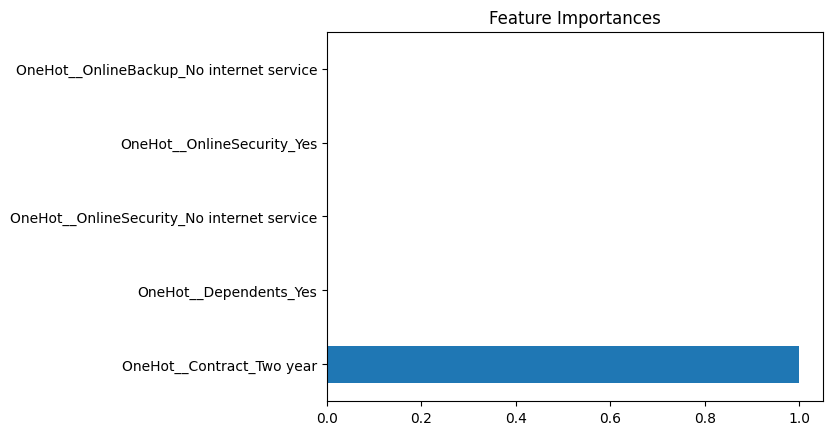

In [38]:
coef1 = pd.Series(TheModel['Modeling'].feature_importances_, DataPrep.get_feature_names_out()).sort_values(ascending = False).head()
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Ternyata model yang kita bangun hanya menggunakan 1 fitur, yaitu apakah kontrak pelanggan bertipe 2 tahun. Jika kita kembali ke bagian Data Analysis, pelanggan berlabel positif (Yes) berjumlah 1316, dimana yang kontraknya bertipe 2 tahun hanya sejumlah 32, atau 2.43%. Dengan parameter yang kita pilih, model menganggap bahwa kriteria ini sudah cukup untuk memprediksi apakah pelanggan berisiko berhenti berlangganan tanpa melihat fitur-fitur lain. Namun, pelanggan dengan kontrak 2 tahun yang berlabel negatif berjumlah 1125, 31.13% dari total pelanggan berlabel negatif, dan semuanya menjadi kasus *false positive*, yang mengakibatkan metric lainnya seperti precision, PR-AUC, dan ROC-AUC yang rendah.

### Saving Model

In [35]:
import pickle
pickle.dump(TheModel, open('Model_Cust_Churn.sav', 'wb'))

## Conclusion

In [40]:
print('The Model\'s Classification Report','\n', classification_report(yTest,yPredTuned))
#pd.DataFrame([[average_precision_score(yTest,yProbTuned),roc_auc_score(yTest,yProbTuned)]],columns=['Recall','PR-AUC','ROC-AUC'])

The Model's Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.32      0.48       723
           1       0.34      0.99      0.51       263

    accuracy                           0.49       986
   macro avg       0.67      0.65      0.49       986
weighted avg       0.82      0.49      0.49       986



Berdasarkan laporan klasifikasinya, model yang kita buat bisa memprediksi sekitar 99% pelanggan yang berisiko berlangganan. Namun, model memprediksi 68% pelanggan yang tidak berisiko sebagai pelanggan berisiko. Untuk tujuan utama kita membangun model ini, mendeteksi pelanggan yang berisiko berhenti, model ini memiliki performa yang sangat baik. Sayangnya, model memiliki 2 kekurangan yang mungkin fatal.

Kekurangan pertama adalah tingginya kasus *false positive*. Hal tersebut bukan meruapakan masalah untuk tujuan utama kita, namun ini berarti model kita tidak cukup baik untuk digunakan jika kita juga ingin mendetksi pelanggan yang memang tidak berisiko untuk berhenti berlangganan. Tergantung dari strategi yang akan dibuat untuk menjaga pelanggan tetap berlangganan, model ini mungkin akan memberikan prediksi yang mengakibatkan biaya yang sebenarnya tidak dibutuhkan yang cukup besar. Dalam hal ini, bisa dikatakan model kita underfit untuk metrik evaluasi selain recall karena terlalu mudah memberikan label positif.

Kekurangan kedua model ini mungkin hanya bekerja dengan baik di dataset spesifik yang kita gunakan sekarang. Hal ini terlihat dari fitur yang digunakan oleh model. Model ini hanya melihat apakah kontrak pelanggan bertipe 2 tahun atau tidak, karena pada dataset ini kriteria tersebutlah yang memang memberikan recall tertinggi. Tapi secara logis, rasanya tidak mungkin itu merupakan satu-satunya alasan pelanggan, mengingat banyaknya faktor-faktor lain yang lebih mungkin membuat pelanggan berhenti berlangganan, seperti kualitas produk dan pelayanan, kecocokan produk dengan pelanggan, harga produk, serta kompetitor [7].

Secara garis besar, model yang kita buat memiliki performa yang sangat baik, bahkan mendekati ajaib, tapi hanya jika kita ingin mendeteksi pelanggan yang berisiko berhenti tanpa memedulikan kasus *false positive*, dan mungkin hanya untuk dataset dimana persentase pelanggan dengan kontrak 2 tahun yang berisiko berhenti sangat kecil.

### Recommendation

Berdasarkan kesimpulan di atas diberikan beberapa rekomendasi berikut:

*   Gunakan model ini hanya jika perusahaan merasa bahwa salah mendeteksi pelanggan yang masih ingin berlanggan sebagai pelanggan berisiko bukan masalah.
*   Menambah fitur yang mungkin memengaruhi kepuasan pelanggan seperti produk lain perusahaan jika ada.
*   Menambah data, khususnya pelanggan dengan kontrak 2 tahun yang memutuskan untuk berhenti berlangganan jika ada, sehingga kita bisa melihat alasan pelanggan memutuskan untuk berhenti berlangganan selain karena memilih kontrak perbulan atau kontrak 1 tahun.
*   Mencoba model-model lain yang tidak kita coba, seperti SVM, neural network, naive bayes, dan lainnya, serta mungkin mencoba melakukan hyperparameter tuning pada model yang tidak kita pilih seperti extreme gradient boost.
*   Mengingat bahwa semakin baik *customer churn rate* perusahaan berarti semakin sedikit persentase pelanggan yang berhenti berlangganan, maka dataset *customer churn* perusahaan tentunya akan menjadi semakin tidak imbang. Mungkin perlu diteliti lebih lanjut penggunaan teknik oversampling lain seperti SMOTENC.



## Referensi


1.   https://www.forbes.com/advisor/business/churn-rate/
2.   https://www.paddle.com/resources/customer-churn
3.   https://neptune.ai/blog/evaluation-metrics-binary-classification
4.   https://medium.com/@onersarpnalcin/standardscaler-vs-minmaxscaler-vs-robustscaler-which-one-to-use-for-your-next-ml-project-ae5b44f571b9
5.   https://www.kaggle.com/code/juanmah/tactic-03-hyperparameter-optimization-adaboost#algorithm
6.   https://medium.com/@chaudhurysrijani/tuning-of-adaboost-with-computational-complexity-8727d01a9d20
7.   https://www.paddle.com/resources/churn-causes
8.   https://neptune.ai/blog/how-to-implement-customer-churn-prediction  
